In [1]:
import io
import requests
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
url = 'http://www.tsi.enst.fr/~roueff/edu/sd205/'
filename = 'Motorcycledata.txt'
Location = url + filename
s = requests.get(Location).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')), sep='\s+', header=None)
df.columns = ['n', 't', 'y']
df.sort_values('t', ascending=1)
t = df['t'].as_matrix()
Y = df['y'].as_matrix()

t_i, m_i = np.unique(t, return_counts=True)
Y_mean_i = df.groupby('t').mean()['y'].as_matrix()


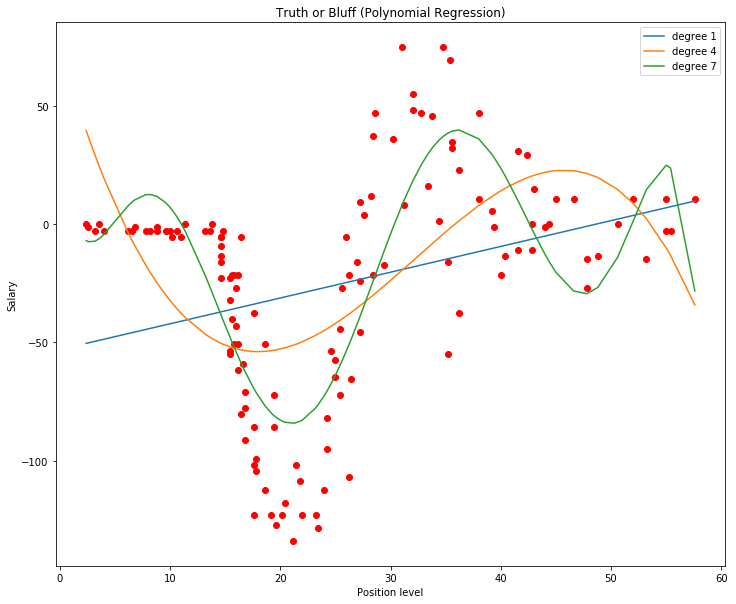

In [12]:
plt.figure(figsize=(12,10))
plt.scatter(t, Y, color='red')
for i in range(1, 10, 3):
    poly_reg = PolynomialFeatures(degree=i)
    t_poly = poly_reg.fit_transform(t.reshape(-1, 1))
    lin_reg = linear_model.LinearRegression()
    lin_reg.fit(t_poly, Y)
    plt.plot(t, lin_reg.predict(t_poly), label='degree %r' % i)
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()